In [1]:
using Base.Threads
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=12)

In [2]:
function sim_binomial(n, k, ps; L=10^5)
    cnt = similar(ps, Int)
    @threads for i in eachindex(ps)
        bin = Binomial(n, ps[i])
        cnt[i] = 0
        for _ in 1:L
            cnt[i] += rand(bin) == k
        end
    end
    lik = cnt/L # likelihood
    ps, lik
end

function plot_sim_binomial(n, k, ps; L=10^5, kwargs...)
    @time ps, lik = sim_binomial(n, k, ps; L)
    plot(ps, lik; label="", kwargs...)
end

plot_sim_binomial (generic function with 1 method)

  6.735400 seconds (337.81 k allocations: 18.020 MiB, 2.75% compilation time)


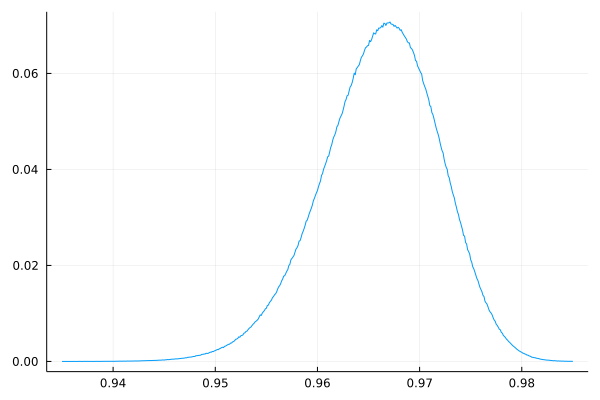

In [3]:
plot_sim_binomial(1000, 967, 0.935:0.0001:0.985; L=10^6)

  4.123206 seconds (106 allocations: 13.078 KiB)


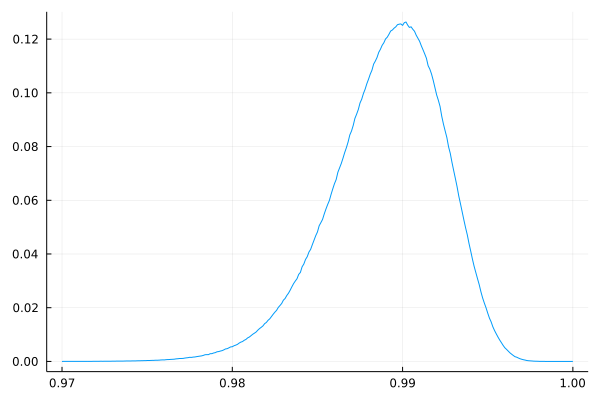

In [4]:
plot_sim_binomial(1000, 990, 0.97:0.0001:1; L=10^6)

  2.782004 seconds (96 allocations: 11.688 KiB)


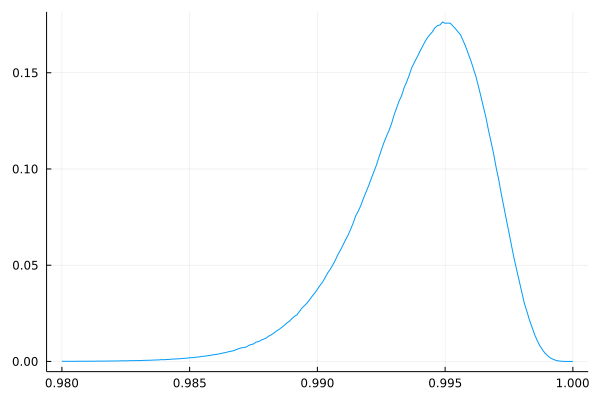

In [5]:
plot_sim_binomial(1000, 995, 0.98:0.0001:1; L=10^6)

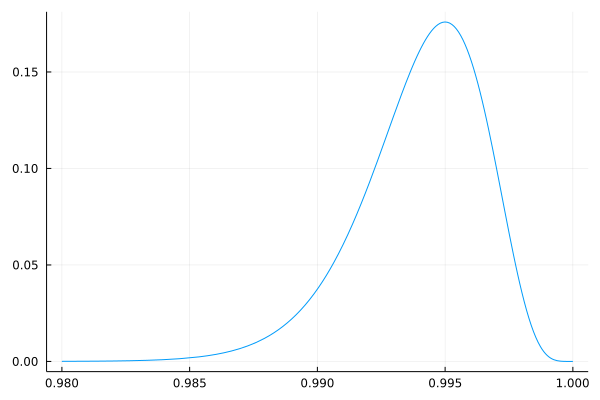

In [6]:
plot(p -> pdf(Binomial(1000, p), 995), 0.98, 1; label="")

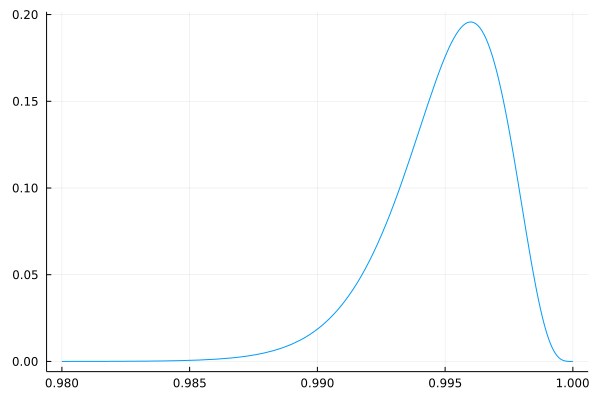

In [7]:
plot(p -> pdf(Binomial(1000, p), 996), 0.98, 1; label="")

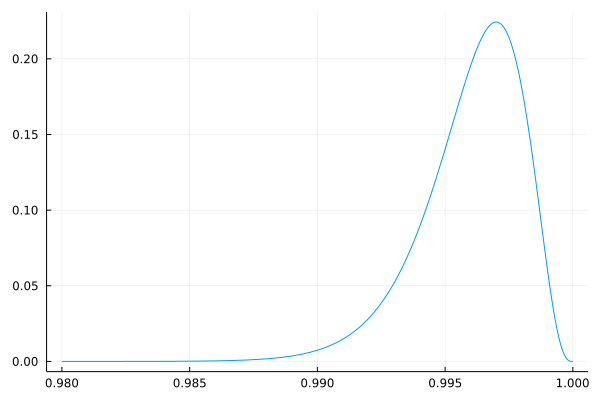

In [8]:
plot(p -> pdf(Binomial(1000, p), 997), 0.98, 1; label="")

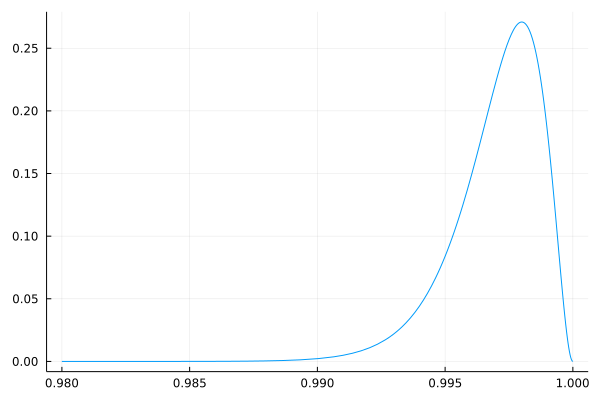

In [9]:
plot(p -> pdf(Binomial(1000, p), 998), 0.98, 1; label="")

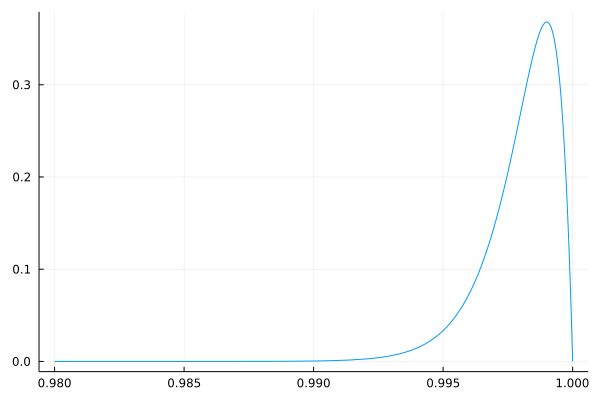

In [10]:
plot(p -> pdf(Binomial(1000, p), 999), 0.98, 1; label="")

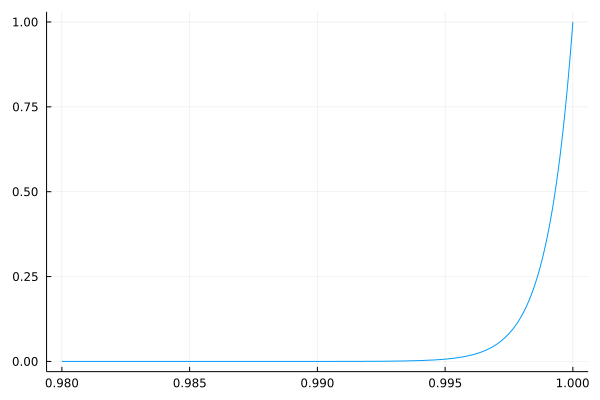

In [11]:
plot(p -> pdf(Binomial(1000, p), 1000), 0.98, 1; label="")